In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [136]:
class Channel_value:
    val = -1.0
    intensity = -1.0


def find_intensity_of_atmospheric_light(img, gray):
    top_num = int(img.shape[0] * img.shape[1] * 0.001)
    toplist = [Channel_value()] * top_num
    dark_channel = find_dark_channel(img)

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            val = img.item(y, x, dark_channel)
            intensity = gray.item(y, x)
            for t in toplist:
                if t.val < val or (t.val == val and t.intensity < intensity):
                    t.val = val
                    t.intensity = intensity
                    break

    max_channel = Channel_value()
    for t in toplist:
        if t.intensity > max_channel.intensity:
            max_channel = t

    return max_channel.intensity


def find_dark_channel(img):
    return np.unravel_index(np.argmin(img), img.shape)[2]


def clamp(minimum, x, maximum):
    return max(minimum, min(x, maximum))

def transmission_map(img, light_intensity, windowSize=20, w=0.95):
    size = img.shape[:2]
    tmap = np.zeros(img.shape, np.float32)

    for y in range(size[0]):
        for x in range(size[1]):
            x_low = max(x-(windowSize//2), 0)
            y_low = max(y-(windowSize//2), 0)
            x_high = min(x+(windowSize//2), size[1])
            y_high = min(y+(windowSize//2), size[0])

            sliceimg = img[y_low:y_high, x_low:x_high]

            dark_channel = find_dark_channel(sliceimg)
            tmap[y,x] = 1.0 - (w * img.item(y, x, dark_channel) / light_intensity)
    return tmap

In [223]:
np.seterr(divide = 'ignore')
def get_entropy(gray,light_intensity):
    pi=0
    for i in range(1,light_intensity+1):
        p = (gray==i).sum()/gray.size
        pi-= p*max(-20,np.log2(p))
    return pi

In [319]:
img=cv2.imread("images/t44.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

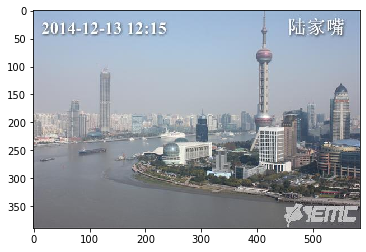

In [320]:
plt.imshow(img)
plt.show()

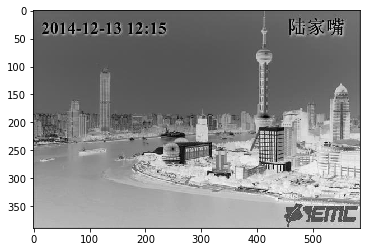

In [321]:
plt.imshow(gray,cmap='Greys')
plt.show()

In [322]:
light_intensity = find_intensity_of_atmospheric_light(img, gray)

In [328]:
tmap=transmission_map(img,light_intensity,20,1)

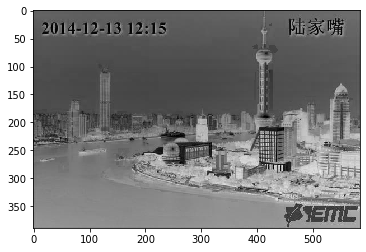

In [329]:
plt.imshow(tmap)
plt.show()

In [325]:
gray.std()

40.72741914726684

In [326]:
get_entropy(gray,light_intensity)

6.857013484901006

In [327]:
img[:,:,2].mean()

164.13249639046379